In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [99]:
rent = pd.read_csv("Counties_Rent/Contra Costa County.csv")
rent.head()

,Unnamed: 0,0 BR,1 BR,2 BR,3 BR,4 BR,Est. Population
0,2006,$865,"$1,045","$1,238","$1,679","$2,079","1,443,741"
1,2007,$874,"$1,055","$1,250","$1,695","$2,099","1,443,741"
2,2008,$866,"$1,046","$1,239","$1,680","$2,080","1,443,741"
3,2009,$905,"$1,093","$1,295","$1,756","$2,174","1,443,741"
4,2010,$963,"$1,162","$1,377","$1,867","$2,312","1,443,741"


In [100]:
rent = rent.rename(columns = {"Unnamed: 0" : "date"})

In [101]:
inflation = pd.read_csv("inflation.csv")
inflation.head()

,Unnamed: 0,date,Inflation Rate (%),Annual Change,
0,46,2006,3.2259,-0.17,NaN
1,47,2007,2.8527,-0.37,NaN
2,48,2008,3.8391,0.99,NaN
3,49,2009,-0.3555,-4.19,NaN
4,50,2010,1.6400,2.00,NaN


In [102]:
rent_df = pd.merge(rent, inflation, on=["date"], how="left")
rent_df.head()

,date,0 BR,1 BR,2 BR,3 BR,4 BR,Est. Population,Unnamed: 0,Inflation Rate (%),Annual Change,
0,2006,$865,"$1,045","$1,238","$1,679","$2,079","1,443,741",46,3.2259,-0.17,NaN
1,2007,$874,"$1,055","$1,250","$1,695","$2,099","1,443,741",47,2.8527,-0.37,NaN
2,2008,$866,"$1,046","$1,239","$1,680","$2,080","1,443,741",48,3.8391,0.99,NaN
3,2009,$905,"$1,093","$1,295","$1,756","$2,174","1,443,741",49,-0.3555,-4.19,NaN
4,2010,$963,"$1,162","$1,377","$1,867","$2,312","1,443,741",50,1.6400,2.00,NaN


In [103]:
rent_df.columns

Index(['date', '0 BR', '1 BR', '2 BR', '3 BR', '4 BR', 'Est. Population',
       'Unnamed: 0', ' Inflation Rate (%)', ' Annual Change', ' '],
      dtype='object')

In [104]:
rent_df = rent_df.drop(columns=["Unnamed: 0", " Annual Change", ' '])

In [105]:
len(rent_df)

16

In [106]:
# obtian cummalitive inflation

cummalitive = []
adjust = []

#iterate through inflation column
for rate in rent_df[" Inflation Rate (%)"]:
    # append rate to list
    print(rate)
    cummalitive.append(rate)
total = 0

#obtain cummalitive rate for each year 
while total <= 15:
    rate = 0
    for i in cummalitive[total:]:
        print(rate)
        rate = rate + i
    total = total + 1    
    adjust.append(rate)
        
    
    

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

In [107]:
# make cummalitive rate column 
rent_df["Cummalitive"] = adjust
rent_df.head()

,date,0 BR,1 BR,2 BR,3 BR,4 BR,Est. Population,Inflation Rate (%),Cummalitive
0,2006,$865,"$1,045","$1,238","$1,679","$2,079","1,443,741",3.2259,33.2119
1,2007,$874,"$1,055","$1,250","$1,695","$2,099","1,443,741",2.8527,29.9860
2,2008,$866,"$1,046","$1,239","$1,680","$2,080","1,443,741",3.8391,27.1333
3,2009,$905,"$1,093","$1,295","$1,756","$2,174","1,443,741",-0.3555,23.2942
4,2010,$963,"$1,162","$1,377","$1,867","$2,312","1,443,741",1.6400,23.6497


In [108]:
#change decimal place
rent_df["Cummalitive"] =  rent_df["Cummalitive"] * 0.01

In [109]:
#get rid of commas and $
rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
rent_df["2 BR"] = rent_df["2 BR"].str.replace("$", "").str.replace(",", "")
rent_df["3 BR"] = rent_df["3 BR"].str.replace("$", "").str.replace(",", "")
rent_df["4 BR"] = rent_df["4 BR"].str.replace("$", "").str.replace(",", "")
rent_df["Est. Population"] = rent_df["Est. Population"].str.replace("$", "").str.replace(",", "")

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/1845621081.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/1845621081.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/1845621081.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=T

In [110]:
rent_df["0 BR"] = rent_df["0 BR"].astype(int)
rent_df["1 BR"] = rent_df["1 BR"].astype(int)
rent_df["2 BR"] = rent_df["2 BR"].astype(int)
rent_df["3 BR"] = rent_df["3 BR"].astype(int)
rent_df["4 BR"] = rent_df["4 BR"].astype(int)
rent_df["Est. Population"] = rent_df["Est. Population"].astype(int)

In [111]:
rent_df["0_BR_adjust"] = rent_df["Cummalitive"] * rent_df["0 BR"] + rent_df["0 BR"]
rent_df["1_BR_adjust"] = rent_df["Cummalitive"] * rent_df["1 BR"] + rent_df["1 BR"]
rent_df["2_BR_adjust"] = rent_df["Cummalitive"] * rent_df["2 BR"] + rent_df["2 BR"]
rent_df["3_BR_adjust"] = rent_df["Cummalitive"] * rent_df["3 BR"] + rent_df["3 BR"]
rent_df["4_BR_adjust"] = rent_df["Cummalitive"] * rent_df["4 BR"] + rent_df["4 BR"]
rent_df

,date,0 BR,1 BR,2 BR,3 BR,4 BR,Est. Population,Inflation Rate (%),Cummalitive,0_BR_adjust,1_BR_adjust,2_BR_adjust,3_BR_adjust,4_BR_adjust
0,2006,865,1045,1238,1679,2079,1443741,3.2259,0.332119,1152.282935,1392.064355,1649.163322,2236.627801,2769.475401
1,2007,874,1055,1250,1695,2099,1443741,2.8527,0.299860,1136.077640,1371.352300,1624.825000,2203.262700,2728.406140
2,2008,866,1046,1239,1680,2080,1443741,3.8391,0.271333,1100.974378,1329.814318,1575.181587,2135.839440,2644.372640
3,2009,905,1093,1295,1756,2174,1443741,-0.3555,0.232942,1115.812510,1347.605606,1596.659890,2165.046152,2680.415908
4,2010,963,1162,1377,1867,2312,1443741,1.6400,0.236497,1190.746611,1436.809514,1702.656369,2308.539899,2858.781064
5,2011,974,1176,1393,1889,2339,1443741,3.1568,0.220097,1188.374478,1434.834072,1699.595121,2304.763233,2853.806883
6,2012,980,1183,1402,1901,2354,1443741,2.0693,0.188529,1164.758420,1406.029807,1666.317658,2259.393629,2797.797266
7,2013,892,1082,1361,1901,2332,1510271,1.4648,0.167836,1041.709712,1263.598552,1589.424796,2220.056236,2723.393552
8,2014,1035,1255,1578,2204,2704,1510271,1.6222,0.153188,1193.549580,1447.250940,1819.730664,2541.626352,3118.220352
9,2015,1039,1260,1585,2213,2716,1510271,0.1186,0.136966,1181.307674,1432.577160,1802.091110,2516.105758,3087.999656


In [121]:
rent_df["Percent_change"] = rent_df["3 BR"].pct_change()

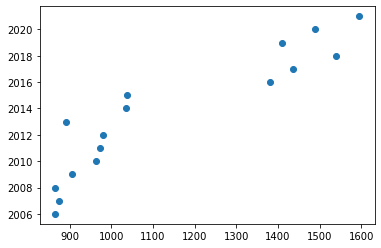

In [128]:
plt.scatter(rent_df["0 BR"], rent_df["date"])

In [174]:
rent_df.columns.tolist()[6:]

['Est. Population',
 ' Inflation Rate (%)',
 'Cummalitive',
 '0_BR_adjust',
 '1_BR_adjust',
 '2_BR_adjust',
 '3_BR_adjust',
 '4_BR_adjust',
 'Percent_change']

In [ ]:
date = rent_df["date"].tolist()

In [203]:
columns = ["0 BR", "1 BR", "2 BR", "3 BR", "4 BR"]
names = rent_df.columns.tolist()[6:]
row = {}

row["date"] = 2022
row["Est. Population"] = rent_df["Est. Population"].tolist()[-1]


for column in columns:    
    # univariate data prep LSTM
    from numpy import array

    # split sequence
    def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
            # find end of pattern 
            end_ix = i + n_steps
            #check if beyond sequence to break
            if end_ix > len(sequence)-1:
                break
            #gather input and output parts of the pattern
            seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
            X.append(seq_x)
            y.append(seq_y)
        return array(X), array(y)
    # sequence 
    rent_rate = list(rent_df[column])
    # number of steps
    n_steps = 3
    X, y = split_sequence(rent_rate, n_steps)
    # summarize the data
    for i in range(len(X)):
        print(X[i], y[i])
        
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    # fit model
    model.fit(X, y, epochs=200, verbose=0)
    
    # demonstrate prediction
    x_input = array(rent_df[column][-3:])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    row[column] = yhat.tolist()[0][0]
    
for name in names:
    row[name] = np.nan
    


[865 874 866] 905
[874 866 905] 963
[866 905 963] 974
[905 963 974] 980
[963 974 980] 892
[974 980 892] 1035
[ 980  892 1035] 1039
[ 892 1035 1039] 1380
[1035 1039 1380] 1435
[1039 1380 1435] 1540
[1380 1435 1540] 1409
[1435 1540 1409] 1488
[1540 1409 1488] 1595
[[1611.9227]]
[1045 1055 1046] 1093
[1055 1046 1093] 1162
[1046 1093 1162] 1176
[1093 1162 1176] 1183
[1162 1176 1183] 1082
[1176 1183 1082] 1255
[1183 1082 1255] 1260
[1082 1255 1260] 1663
[1255 1260 1663] 1723
[1260 1663 1723] 1855
[1663 1723 1855] 1706
[1723 1855 1706] 1808
[1855 1706 1808] 1934
[[1971.3752]]
[1238 1250 1239] 1295
[1250 1239 1295] 1377
[1239 1295 1377] 1393
[1295 1377 1393] 1402
[1377 1393 1402] 1361
[1393 1402 1361] 1578
[1402 1361 1578] 1585
[1361 1578 1585] 2103
[1578 1585 2103] 2173
[1585 2103 2173] 2329
[2103 2173 2329] 2126
[2173 2329 2126] 2239
[2329 2126 2239] 2383
[[2439.5212]]
[1679 1695 1680] 1756
[1695 1680 1756] 1867
[1680 1756 1867] 1889
[1756 1867 1889] 1901
[1867 1889 1901] 1901
[1889 1901 19

In [205]:
tester = pd.DataFrame.transpose(pd.DataFrame.from_dict(row, orient="index"))

In [207]:
tester["date"] = tester["date"].astype(int)

for column in columns:
    tester[column] = tester[column].astype(int) 

In [208]:
tester

,date,Est. Population,0 BR,1 BR,2 BR,3 BR,4 BR,Inflation Rate (%),Cummalitive,0_BR_adjust,1_BR_adjust,2_BR_adjust,3_BR_adjust,4_BR_adjust,Percent_change
0,2022,NaN,1611,1971,2439,3313,3846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
rent_df.append(tester)

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/99228614.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df.append(tester)


,date,0 BR,1 BR,2 BR,3 BR,4 BR,Est. Population,Inflation Rate (%),Cummalitive,0_BR_adjust,1_BR_adjust,2_BR_adjust,3_BR_adjust,4_BR_adjust,Percent_change
0,2006,865,1045,1238,1679,2079,1443741.0,3.2259,0.332119,1152.282935,1392.064355,1649.163322,2236.627801,2769.475401,NaN
1,2007,874,1055,1250,1695,2099,1443741.0,2.8527,0.299860,1136.077640,1371.352300,1624.825000,2203.262700,2728.406140,0.009529
2,2008,866,1046,1239,1680,2080,1443741.0,3.8391,0.271333,1100.974378,1329.814318,1575.181587,2135.839440,2644.372640,-0.008850
3,2009,905,1093,1295,1756,2174,1443741.0,-0.3555,0.232942,1115.812510,1347.605606,1596.659890,2165.046152,2680.415908,0.045238
4,2010,963,1162,1377,1867,2312,1443741.0,1.6400,0.236497,1190.746611,1436.809514,1702.656369,2308.539899,2858.781064,0.063212
5,2011,974,1176,1393,1889,2339,1443741.0,3.1568,0.220097,1188.374478,1434.834072,1699.595121,2304.763233,2853.806883,0.011784
6,2012,980,1183,1402,1901,2354,1443741.0,2.0693,0.188529,1164.758420,1406.029807,1666.317658,2259.393629,2797.797266,0.006353
7,2013,892,1082,1361,1901,2332,1510271.0,1.4648,0.167836,1041.709712,1263.598552,1589.424796,2220.056236,2723.393552,0.000000
8,2014,1035,1255,1578,2204,2704,1510271.0,1.6222,0.153188,1193.549580,1447.250940,1819.730664,2541.626352,3118.220352,0.159390
9,2015,1039,1260,1585,2213,2716,1510271.0,0.1186,0.136966,1181.307674,1432.577160,1802.091110,2516.105758,3087.999656,0.004083


In [214]:
counties = ['Yuba County.csv'
, 'Alameda County.csv'
, 'Alpine County.csv'
, 'Amador County.csv'
, 'Butte County.csv'
, 'Calaveras County.csv'
, 'Colusa County.csv'
, 'Contra Costa County.csv'
, 'Del Norte County.csv'
, 'El Dorado County.csv'
, 'Fresno County.csv'
, 'Glenn County.csv'
, 'Humboldt County.csv'
, 'Imperial County.csv'
, 'Inyo County.csv'
, 'Kern County.csv'
, 'Kings County.csv'
, 'Lake County.csv'
, 'Lassen County.csv'
, 'Los Angeles County.csv'
, 'Madera County.csv'
, 'Marin County.csv'
, 'Mariposa County.csv'
, 'Mendocino County.csv'
, 'Merced County.csv'
, 'Modoc County.csv'
, 'Mono County.csv'
, 'Monterey County.csv'
, 'Napa County.csv'
, 'Nevada County.csv'
, 'Orange County.csv'
, 'Placer County.csv'
, 'Plumas County.csv'
, 'Riverside County.csv'
, 'Sacramento County.csv'
, 'San Benito County.csv'
, 'San Bernardino County.csv'
, 'San Diego County.csv'
, 'San Francisco County.csv'
, 'San Joaquin County.csv'
, 'San Luis Obispo County.csv'
, 'San Mateo County.csv'
, 'Santa Barbara County.csv'
, 'Santa Clara County.csv'
, 'Santa Cruz County.csv'
, 'Shasta County.csv'
, 'Sierra County.csv'
, 'Siskiyou County.csv'
, 'Solano County.csv'
, 'Sonoma County.csv'
, 'Stanislaus County.csv'
, 'Sutter County.csv'
, 'Tehama County.csv'
, 'Trinity County.csv'
, 'Tulare County.csv'
, 'Tuolumne County.csv'
, 'Ventura County.csv'
, 'Yolo County.csv']
            
for county in counties:
    rent = pd.read_csv(f"Counties_Rent/{county}")
    rent = rent.rename(columns = {"Unnamed: 0" : "date"})
    inflation = pd.read_csv("inflation.csv")
    rent_df = pd.merge(rent, inflation, on=["date"], how="left")
    rent_df = rent_df.drop(columns=["Unnamed: 0", " Annual Change", ' '])

    # obtian cummalitive inflation

    cummalitive = []
    adjust = []

    #iterate through inflation column
    for rate in rent_df[" Inflation Rate (%)"]:
        # append rate to list
        print(rate)
        cummalitive.append(rate)
    total = 0

    #obtain cummalitive rate for each year 
    while total <= 15:
        rate = 0
        for i in cummalitive[total:]:
            print(rate)
            rate = rate + i
        total = total + 1    
        adjust.append(rate)

    # make cummalitive rate column 
    rent_df["Cummalitive"] = adjust
    rent_df.head()

    #change decimal place
    rent_df["Cummalitive"] =  rent_df["Cummalitive"] * 0.01

    #get rid of commas and $
    rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
    rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
    rent_df["2 BR"] = rent_df["2 BR"].str.replace("$", "").str.replace(",", "")
    rent_df["3 BR"] = rent_df["3 BR"].str.replace("$", "").str.replace(",", "")
    rent_df["4 BR"] = rent_df["4 BR"].str.replace("$", "").str.replace(",", "")
    rent_df["Est. Population"] = rent_df["Est. Population"].str.replace("$", "").str.replace(",", "")

    rent_df["0 BR"] = rent_df["0 BR"].astype(int)
    rent_df["1 BR"] = rent_df["1 BR"].astype(int)
    rent_df["2 BR"] = rent_df["2 BR"].astype(int)
    rent_df["3 BR"] = rent_df["3 BR"].astype(int)
    rent_df["4 BR"] = rent_df["4 BR"].astype(int)
    rent_df["Est. Population"] = rent_df["Est. Population"].astype(int)

    rent_df["0_BR_adjust"] = rent_df["Cummalitive"] * rent_df["0 BR"] + rent_df["0 BR"]
    rent_df["1_BR_adjust"] = rent_df["Cummalitive"] * rent_df["1 BR"] + rent_df["1 BR"]
    rent_df["2_BR_adjust"] = rent_df["Cummalitive"] * rent_df["2 BR"] + rent_df["2 BR"]
    rent_df["3_BR_adjust"] = rent_df["Cummalitive"] * rent_df["3 BR"] + rent_df["3 BR"]
    rent_df["4_BR_adjust"] = rent_df["Cummalitive"] * rent_df["4 BR"] + rent_df["4 BR"]

    columns = ["0 BR", "1 BR", "2 BR", "3 BR", "4 BR"]
    names = rent_df.columns.tolist()[6:]
    row = {}

    row["date"] = 2022
    row["Est. Population"] = rent_df["Est. Population"].tolist()[-1]


    for column in columns:    
        # univariate data prep LSTM
        from numpy import array

        # split sequence
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find end of pattern 
                end_ix = i + n_steps
                #check if beyond sequence to break
                if end_ix > len(sequence)-1:
                    break
                #gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)
        # sequence 
        rent_rate = list(rent_df[column])
        # number of steps
        n_steps = 3
        X, y = split_sequence(rent_rate, n_steps)
        # summarize the data
        for i in range(len(X)):
            print(X[i], y[i])

        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))

        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # fit model
        model.fit(X, y, epochs=200, verbose=0)

        # demonstrate prediction
        x_input = array(rent_df[column][-3:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        row[column] = yhat.tolist()[0][0]

    for name in names:
        row[name] = np.nan

    tester = pd.DataFrame.transpose(pd.DataFrame.from_dict(row, orient="index"))

    tester["date"] = tester["date"].astype(int)

    for column in columns:
        tester[column] = tester[column].astype(int) 

    rent_df = rent_df.append(tester)

    rent_df.to_csv(f"Counties_rent_finalized/{county}")

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:98: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when rege

[1045 1055 1046] 1093
[1055 1046 1093] 1162
[1046 1093 1162] 1176
[1093 1162 1176] 1183
[1162 1176 1183] 1082
[1176 1183 1082] 1255
[1183 1082 1255] 1260
[1082 1255 1260] 1663
[1255 1260 1663] 1723
[1260 1663 1723] 1855
[1663 1723 1855] 1706
[1723 1855 1706] 1808
[1855 1706 1808] 1934
[1238 1250 1239] 1295
[1250 1239 1295] 1377
[1239 1295 1377] 1393
[1295 1377 1393] 1402
[1377 1393 1402] 1361
[1393 1402 1361] 1578
[1402 1361 1578] 1585
[1361 1578 1585] 2103
[1578 1585 2103] 2173
[1585 2103 2173] 2329
[2103 2173 2329] 2126
[2173 2329 2126] 2239
[2329 2126 2239] 2383
[1679 1695 1680] 1756
[1695 1680 1756] 1867
[1680 1756 1867] 1889
[1756 1867 1889] 1901
[1867 1889 1901] 1901
[1889 1901 1901] 2204
[1901 1901 2204] 2213
[1901 2204 2213] 2932
[2204 2213 2932] 3017
[2213 2932 3017] 3219
[2932 3017 3219] 2925
[3017 3219 2925] 3042
[3219 2925 3042] 3196
[2079 2099 2080] 2174
[2099 2080 2174] 2312
[2080 2174 2312] 2339
[2174 2312 2339] 2354
[2312 2339 2354] 2332
[2339 2354 2332] 2704
[2354 2332

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:100: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["4 BR"] = rent_df["4 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:101: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["Est. Population"] = rent_df["Est. Population"].str.replace("$", "").str.replace(",", "")


[1045 1055 1046] 1093
[1055 1046 1093] 1162
[1046 1093 1162] 1176
[1093 1162 1176] 1183
[1162 1176 1183] 1082
[1176 1183 1082] 1255
[1183 1082 1255] 1260
[1082 1255 1260] 1663
[1255 1260 1663] 1723
[1260 1663 1723] 1855
[1663 1723 1855] 1706
[1723 1855 1706] 1808
[1855 1706 1808] 1934
[1238 1250 1239] 1295
[1250 1239 1295] 1377
[1239 1295 1377] 1393
[1295 1377 1393] 1402
[1377 1393 1402] 1361
[1393 1402 1361] 1578
[1402 1361 1578] 1585
[1361 1578 1585] 2103
[1578 1585 2103] 2173
[1585 2103 2173] 2329
[2103 2173 2329] 2126
[2173 2329 2126] 2239
[2329 2126 2239] 2383
[1679 1695 1680] 1756
[1695 1680 1756] 1867
[1680 1756 1867] 1889
[1756 1867 1889] 1901
[1867 1889 1901] 1901
[1889 1901 1901] 2204
[1901 1901 2204] 2213
[1901 2204 2213] 2932
[2204 2213 2932] 3017
[2213 2932 3017] 3219
[2932 3017 3219] 2925
[3017 3219 2925] 3042
[3219 2925 3042] 3196
[2079 2099 2080] 2174
[2099 2080 2174] 2312
[2080 2174 2312] 2339
[2174 2312 2339] 2354
[2312 2339 2354] 2332
[2339 2354 2332] 2704
[2354 2332

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:101: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["Est. Population"] = rent_df["Est. Population"].str.replace("$", "").str.replace(",", "")


[865 874 866] 905
[874 866 905] 963
[866 905 963] 974
[905 963 974] 980
[963 974 980] 892
[974 980 892] 1035
[ 980  892 1035] 1039
[ 892 1035 1039] 1380
[1035 1039 1380] 1435
[1039 1380 1435] 1540
[1380 1435 1540] 1409
[1435 1540 1409] 1488
[1540 1409 1488] 1595
[1045 1055 1046] 1093
[1055 1046 1093] 1162
[1046 1093 1162] 1176
[1093 1162 1176] 1183
[1162 1176 1183] 1082
[1176 1183 1082] 1255
[1183 1082 1255] 1260
[1082 1255 1260] 1663
[1255 1260 1663] 1723
[1260 1663 1723] 1855
[1663 1723 1855] 1706
[1723 1855 1706] 1808
[1855 1706 1808] 1934
[1238 1250 1239] 1295
[1250 1239 1295] 1377
[1239 1295 1377] 1393
[1295 1377 1393] 1402
[1377 1393 1402] 1361
[1393 1402 1361] 1578
[1402 1361 1578] 1585
[1361 1578 1585] 2103
[1578 1585 2103] 2173
[1585 2103 2173] 2329
[2103 2173 2329] 2126
[2173 2329 2126] 2239
[2329 2126 2239] 2383
[1679 1695 1680] 1756
[1695 1680 1756] 1867
[1680 1756 1867] 1889
[1756 1867 1889] 1901
[1867 1889 1901] 1901
[1889 1901 1901] 2204
[1901 1901 2204] 2213
[1901 2204 

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:99: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["3 BR"] = rent_df["3 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:100: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["4 BR"] = rent_df["4 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:101: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when re

[865 874 866] 905
[874 866 905] 963
[866 905 963] 974
[905 963 974] 980
[963 974 980] 892
[974 980 892] 1035
[ 980  892 1035] 1039
[ 892 1035 1039] 1380
[1035 1039 1380] 1435
[1039 1380 1435] 1540
[1380 1435 1540] 1409
[1435 1540 1409] 1488
[1540 1409 1488] 1595
[1045 1055 1046] 1093
[1055 1046 1093] 1162
[1046 1093 1162] 1176
[1093 1162 1176] 1183
[1162 1176 1183] 1082
[1176 1183 1082] 1255
[1183 1082 1255] 1260
[1082 1255 1260] 1663
[1255 1260 1663] 1723
[1260 1663 1723] 1855
[1663 1723 1855] 1706
[1723 1855 1706] 1808
[1855 1706 1808] 1934
[1238 1250 1239] 1295
[1250 1239 1295] 1377
[1239 1295 1377] 1393
[1295 1377 1393] 1402
[1377 1393 1402] 1361
[1393 1402 1361] 1578
[1402 1361 1578] 1585
[1361 1578 1585] 2103
[1578 1585 2103] 2173
[1585 2103 2173] 2329
[2103 2173 2329] 2126
[2173 2329 2126] 2239
[2329 2126 2239] 2383
[1679 1695 1680] 1756
[1695 1680 1756] 1867
[1680 1756 1867] 1889
[1756 1867 1889] 1901
[1867 1889 1901] 1901
[1889 1901 1901] 2204
[1901 1901 2204] 2213
[1901 2204 

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")


3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:98: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["2 BR"] = rent_df["2 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:99: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["3 BR"] = rent_df["3 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:100: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when reg

[865 874 866] 905
[874 866 905] 963
[866 905 963] 974
[905 963 974] 980
[963 974 980] 892
[974 980 892] 1035
[ 980  892 1035] 1039
[ 892 1035 1039] 1380
[1035 1039 1380] 1435
[1039 1380 1435] 1540
[1380 1435 1540] 1409
[1435 1540 1409] 1488
[1540 1409 1488] 1595
[1045 1055 1046] 1093
[1055 1046 1093] 1162
[1046 1093 1162] 1176
[1093 1162 1176] 1183
[1162 1176 1183] 1082
[1176 1183 1082] 1255
[1183 1082 1255] 1260
[1082 1255 1260] 1663
[1255 1260 1663] 1723
[1260 1663 1723] 1855
[1663 1723 1855] 1706
[1723 1855 1706] 1808
[1855 1706 1808] 1934
[1238 1250 1239] 1295
[1250 1239 1295] 1377
[1239 1295 1377] 1393
[1295 1377 1393] 1402
[1377 1393 1402] 1361
[1393 1402 1361] 1578
[1402 1361 1578] 1585
[1361 1578 1585] 2103
[1578 1585 2103] 2173
[1585 2103 2173] 2329
[2103 2173 2329] 2126
[2173 2329 2126] 2239
[2329 2126 2239] 2383
[1679 1695 1680] 1756
[1695 1680 1756] 1867
[1680 1756 1867] 1889
[1756 1867 1889] 1901
[1867 1889 1901] 1901
[1889 1901 1901] 2204
[1901 1901 2204] 2213
[1901 2204 

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")


3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:98: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["2 BR"] = rent_df["2 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:99: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["3 BR"] = rent_df["3 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:100: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when reg

[1045 1055 1046] 1093
[1055 1046 1093] 1162
[1046 1093 1162] 1176
[1093 1162 1176] 1183
[1162 1176 1183] 1082
[1176 1183 1082] 1255
[1183 1082 1255] 1260
[1082 1255 1260] 1663
[1255 1260 1663] 1723
[1260 1663 1723] 1855
[1663 1723 1855] 1706
[1723 1855 1706] 1808
[1855 1706 1808] 1934
[1238 1250 1239] 1295
[1250 1239 1295] 1377
[1239 1295 1377] 1393
[1295 1377 1393] 1402
[1377 1393 1402] 1361
[1393 1402 1361] 1578
[1402 1361 1578] 1585
[1361 1578 1585] 2103
[1578 1585 2103] 2173
[1585 2103 2173] 2329
[2103 2173 2329] 2126
[2173 2329 2126] 2239
[2329 2126 2239] 2383
[1679 1695 1680] 1756
[1695 1680 1756] 1867
[1680 1756 1867] 1889
[1756 1867 1889] 1901
[1867 1889 1901] 1901
[1889 1901 1901] 2204
[1901 1901 2204] 2213
[1901 2204 2213] 2932
[2204 2213 2932] 3017
[2213 2932 3017] 3219
[2932 3017 3219] 2925
[3017 3219 2925] 3042
[3219 2925 3042] 3196
[2079 2099 2080] 2174
[2099 2080 2174] 2312
[2080 2174 2312] 2339
[2174 2312 2339] 2354
[2312 2339 2354] 2332
[2339 2354 2332] 2704
[2354 2332

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:100: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["4 BR"] = rent_df["4 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:101: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["Est. Population"] = rent_df["Est. Population"].str.replace("$", "").str.replace(",", "")


[865 874 866] 905
[874 866 905] 963
[866 905 963] 974
[905 963 974] 980
[963 974 980] 892
[974 980 892] 1035
[ 980  892 1035] 1039
[ 892 1035 1039] 1380
[1035 1039 1380] 1435
[1039 1380 1435] 1540
[1380 1435 1540] 1409
[1435 1540 1409] 1488
[1540 1409 1488] 1595
[1045 1055 1046] 1093
[1055 1046 1093] 1162
[1046 1093 1162] 1176
[1093 1162 1176] 1183
[1162 1176 1183] 1082
[1176 1183 1082] 1255
[1183 1082 1255] 1260
[1082 1255 1260] 1663
[1255 1260 1663] 1723
[1260 1663 1723] 1855
[1663 1723 1855] 1706
[1723 1855 1706] 1808
[1855 1706 1808] 1934
[1238 1250 1239] 1295
[1250 1239 1295] 1377
[1239 1295 1377] 1393
[1295 1377 1393] 1402
[1377 1393 1402] 1361
[1393 1402 1361] 1578
[1402 1361 1578] 1585
[1361 1578 1585] 2103
[1578 1585 2103] 2173
[1585 2103 2173] 2329
[2103 2173 2329] 2126
[2173 2329 2126] 2239
[2329 2126 2239] 2383
[1679 1695 1680] 1756
[1695 1680 1756] 1867
[1680 1756 1867] 1889
[1756 1867 1889] 1901
[1867 1889 1901] 1901
[1889 1901 1901] 2204
[1901 1901 2204] 2213
[1901 2204 

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:101: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["Est. Population"] = rent_df["Est. Population"].str.replace("$", "").str.replace(",", "")


[865 874 866] 905
[874 866 905] 963
[866 905 963] 974
[905 963 974] 980
[963 974 980] 892
[974 980 892] 1035
[ 980  892 1035] 1039
[ 892 1035 1039] 1380
[1035 1039 1380] 1435
[1039 1380 1435] 1540
[1380 1435 1540] 1409
[1435 1540 1409] 1488
[1540 1409 1488] 1595
[1045 1055 1046] 1093
[1055 1046 1093] 1162
[1046 1093 1162] 1176
[1093 1162 1176] 1183
[1162 1176 1183] 1082
[1176 1183 1082] 1255
[1183 1082 1255] 1260
[1082 1255 1260] 1663
[1255 1260 1663] 1723
[1260 1663 1723] 1855
[1663 1723 1855] 1706
[1723 1855 1706] 1808
[1855 1706 1808] 1934
[1238 1250 1239] 1295
[1250 1239 1295] 1377
[1239 1295 1377] 1393
[1295 1377 1393] 1402
[1377 1393 1402] 1361
[1393 1402 1361] 1578
[1402 1361 1578] 1585
[1361 1578 1585] 2103
[1578 1585 2103] 2173
[1585 2103 2173] 2329
[2103 2173 2329] 2126
[2173 2329 2126] 2239
[2329 2126 2239] 2383
[1679 1695 1680] 1756
[1695 1680 1756] 1867
[1680 1756 1867] 1889
[1756 1867 1889] 1901
[1867 1889 1901] 1901
[1889 1901 1901] 2204
[1901 1901 2204] 2213
[1901 2204 

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:101: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["Est. Population"] = rent_df["Est. Population"].str.replace("$", "").str.replace(",", "")


[865 874 866] 905
[874 866 905] 963
[866 905 963] 974
[905 963 974] 980
[963 974 980] 892
[974 980 892] 1035
[ 980  892 1035] 1039
[ 892 1035 1039] 1380
[1035 1039 1380] 1435
[1039 1380 1435] 1540
[1380 1435 1540] 1409
[1435 1540 1409] 1488
[1540 1409 1488] 1595
[1045 1055 1046] 1093
[1055 1046 1093] 1162
[1046 1093 1162] 1176
[1093 1162 1176] 1183
[1162 1176 1183] 1082
[1176 1183 1082] 1255
[1183 1082 1255] 1260
[1082 1255 1260] 1663
[1255 1260 1663] 1723
[1260 1663 1723] 1855
[1663 1723 1855] 1706
[1723 1855 1706] 1808
[1855 1706 1808] 1934
[1238 1250 1239] 1295
[1250 1239 1295] 1377
[1239 1295 1377] 1393
[1295 1377 1393] 1402
[1377 1393 1402] 1361
[1393 1402 1361] 1578
[1402 1361 1578] 1585
[1361 1578 1585] 2103
[1578 1585 2103] 2173
[1585 2103 2173] 2329
[2103 2173 2329] 2126
[2173 2329 2126] 2239
[2329 2126 2239] 2383
[1679 1695 1680] 1756
[1695 1680 1756] 1867
[1680 1756 1867] 1889
[1756 1867 1889] 1901
[1867 1889 1901] 1901
[1889 1901 1901] 2204
[1901 1901 2204] 2213
[1901 2204 

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["0 BR"] = rent_df["0 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:97: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rent_df["1 BR"] = rent_df["1 BR"].str.replace("$", "").str.replace(",", "")
/var/folders/g3/164q6cz52

3.2259
2.8527
3.8391
-0.3555
1.64
3.1568
2.0693
1.4648
1.6222
0.1186
1.2616
2.1301
2.4426
1.8122
1.2336
4.6979
0
3.2259
6.0786
9.9177
9.5622
11.202200000000001
14.359000000000002
16.4283
17.8931
19.5153
19.6339
20.895500000000002
23.0256
25.4682
27.2804
28.514
0
2.8527
6.691800000000001
6.3363000000000005
7.9763
11.1331
13.2024
14.667200000000001
16.2894
16.408
17.669600000000003
19.7997
22.2423
24.0545
25.2881
0
3.8391
3.4836
5.1236
8.2804
10.3497
11.8145
13.4367
13.5553
14.8169
16.947
19.389599999999998
21.2018
22.435399999999998
0
-0.3555
1.2845
4.4413
6.5106
7.9754000000000005
9.5976
9.7162
10.9778
13.1079
15.550500000000001
17.3627
18.5963
0
1.64
4.7968
6.8661
8.3309
9.9531
10.0717
11.3333
13.4634
15.906
17.7182
18.9518
0
3.1568
5.226100000000001
6.690900000000001
8.3131
8.431700000000001
9.6933
11.823400000000001
14.266000000000002
16.078200000000002
17.3118
0
2.0693
3.5341000000000005
5.156300000000001
5.274900000000001
6.5365
8.6666
11.109200000000001
12.921400000000002
14.1550

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_4840/2596030210.py:179: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_df = rent_df.append(tester)


In [215]:
rent_df

,date,0 BR,1 BR,2 BR,3 BR,4 BR,Est. Population,Inflation Rate (%),Cummalitive,0_BR_adjust,1_BR_adjust,2_BR_adjust,3_BR_adjust,4_BR_adjust
0,2006,865,1045,1238,1679,2079,1443741.0,3.2259,0.332119,1152.282935,1392.064355,1649.163322,2236.627801,2769.475401
1,2007,874,1055,1250,1695,2099,1443741.0,2.8527,0.299860,1136.077640,1371.352300,1624.825000,2203.262700,2728.406140
2,2008,866,1046,1239,1680,2080,1443741.0,3.8391,0.271333,1100.974378,1329.814318,1575.181587,2135.839440,2644.372640
3,2009,905,1093,1295,1756,2174,1443741.0,-0.3555,0.232942,1115.812510,1347.605606,1596.659890,2165.046152,2680.415908
4,2010,963,1162,1377,1867,2312,1443741.0,1.6400,0.236497,1190.746611,1436.809514,1702.656369,2308.539899,2858.781064
5,2011,974,1176,1393,1889,2339,1443741.0,3.1568,0.220097,1188.374478,1434.834072,1699.595121,2304.763233,2853.806883
6,2012,980,1183,1402,1901,2354,1443741.0,2.0693,0.188529,1164.758420,1406.029807,1666.317658,2259.393629,2797.797266
7,2013,892,1082,1361,1901,2332,1510271.0,1.4648,0.167836,1041.709712,1263.598552,1589.424796,2220.056236,2723.393552
8,2014,1035,1255,1578,2204,2704,1510271.0,1.6222,0.153188,1193.549580,1447.250940,1819.730664,2541.626352,3118.220352
9,2015,1039,1260,1585,2213,2716,1510271.0,0.1186,0.136966,1181.307674,1432.577160,1802.091110,2516.105758,3087.999656
